In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
corr = df.corr()

In [6]:
import seaborn as sns

<Axes: >

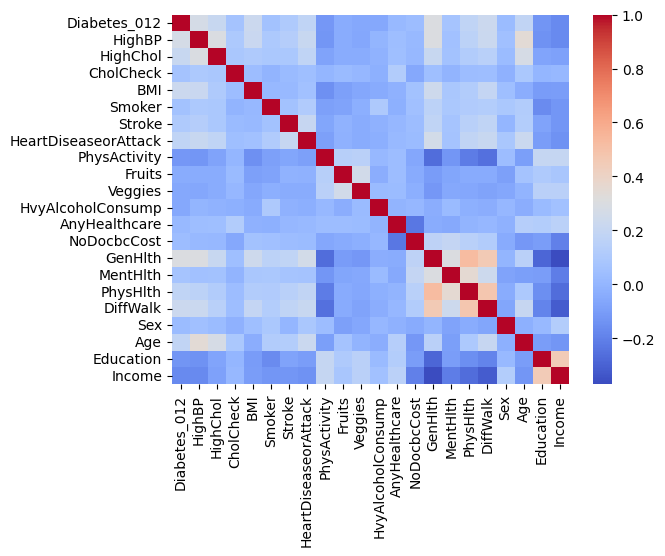

In [8]:
sns.heatmap(corr, cmap = "coolwarm")

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Split the data into features and labels
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the DNN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/10


6342/6342 [==============================] - 12s 2ms/step - loss: 0.4019 - accuracy: 0.8477 - val_loss: 0.3924 - val_accuracy: 0.8498
Epoch 2/10
6342/6342 [==============================] - 11s 2ms/step - loss: 0.3955 - accuracy: 0.8492 - val_loss: 0.3943 - val_accuracy: 0.8463
Epoch 3/10
6342/6342 [==============================] - 11s 2ms/step - loss: 0.3944 - accuracy: 0.8492 - val_loss: 0.3920 - val_accuracy: 0.8501
Epoch 4/10
6342/6342 [==============================] - 11s 2ms/step - loss: 0.3935 - accuracy: 0.8494 - val_loss: 0.3949 - val_accuracy: 0.8504
Epoch 5/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.3929 - accuracy: 0.8497 - val_loss: 0.3913 - val_accuracy: 0.8493
Epoch 6/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.3923 - accuracy: 0.8498 - val_loss: 0.3908 - val_accuracy: 0.8500
Epoch 7/10
6342/6342 [==============================] - 11s 2ms/step - loss: 0.3918 - accuracy: 0.8504 - val_loss: 0.3920 - val_

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Split the data into features and labels
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input format
# Assuming each feature is reshaped into a 2D format, we can reshape it to (feature_count, 1, 1)
X_train = X_train.reshape(-1, X_train.shape[1], 1, 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1, 1)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)),
    MaxPooling2D(pool_size=(1, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
6342/6342 [==============================] - 19s 3ms/step - loss: 0.4006 - accuracy: 0.8474 - val_loss: 0.3962 - val_accuracy: 0.8482
Epoch 2/10
6342/6342 [==============================] - 18s 3ms/step - loss: 0.3963 - accuracy: 0.8484 - val_loss: 0.3912 - val_accuracy: 0.8504
Epoch 3/10
6342/6342 [==============================] - 18s 3ms/step - loss: 0.3952 - accuracy: 0.8491 - val_loss: 0.3909 - val_accuracy: 0.8497
Epoch 4/10
6342/6342 [==============================] - 19s 3ms/step - loss: 0.3944 - accuracy: 0.8492 - val_loss: 0.3909 - val_accuracy: 0.8506
Epoch 5/10
6342/6342 [==============================] - 19s 3ms/step - loss: 0.3938 - accuracy: 0.8495 - val_loss: 0.3924 - val_accuracy: 0.8493
Epoch 6/10
6342/6342 [==============================] - 18s 3ms/step - loss: 0.3935 - accuracy: 0.8498 - val_loss: 0.3910 - val_accuracy: 0.8511
Epoch 7/10
6342/6342 [==============================] - 20s 3ms/step - loss: 0.3931 - accuracy: 0.8498 - val_loss: 0.3905 - val_ac

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the RNN input format
# The input shape for RNNs is (samples, time steps, features)
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Build the RNN model
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
6342/6342 [==============================] - 31s 5ms/step - loss: 0.4149 - accuracy: 0.8432 - val_loss: 0.3992 - val_accuracy: 0.8467
Epoch 2/10
6342/6342 [==============================] - 29s 5ms/step - loss: 0.4032 - accuracy: 0.8461 - val_loss: 0.3954 - val_accuracy: 0.8482
Epoch 3/10
6342/6342 [==============================] - 29s 5ms/step - loss: 0.4020 - accuracy: 0.8468 - val_loss: 0.3961 - val_accuracy: 0.8482
Epoch 4/10
6342/6342 [==============================] - 29s 5ms/step - loss: 0.4007 - accuracy: 0.8473 - val_loss: 0.4011 - val_accuracy: 0.8464
Epoch 5/10
6342/6342 [==============================] - 29s 5ms/step - loss: 0.3999 - accuracy: 0.8468 - val_loss: 0.4004 - val_accuracy: 0.8490
Epoch 6/10
6342/6342 [==============================] - 30s 5ms/step - loss: 0.3994 - accuracy: 0.8478 - val_loss: 0.3938 - val_accuracy: 0.8493
Epoch 7/10
6342/6342 [==============================] - 33s 5ms/step - loss: 0.3989 - accuracy: 0.8474 - val_loss: 0.3999 - val_ac